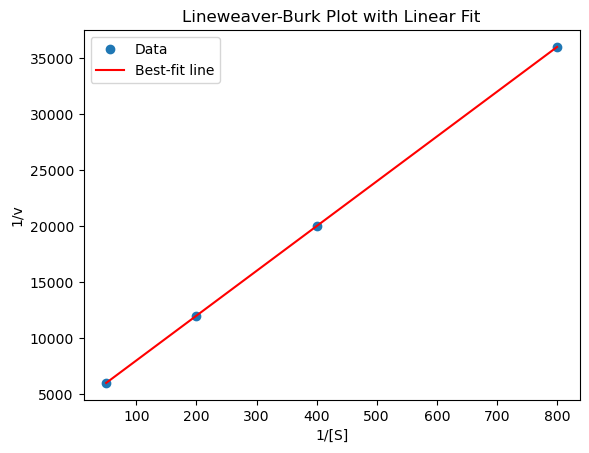

Slope (m): 3.9934e+01 mol/dm^3
Y-intercept (b): 4.0239e+03 mol/dm^3/s


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Linear fitting function
def lin_fit(x, m, b):
    return m * x + b

# Given data
v_values = np.array([2.78e-5, 5.00e-5, 8.33e-5, 1.66e-4])
co2_concentration_values = np.array([1.25, 2.50, 5.00, 20.00])

# Calculate 1/v and 1/[S]
one_over_v = 1 / v_values
one_over_S = 1 / (co2_concentration_values * 1e-3)  # converting to mol/dm^3

# Use curve_fit to fit the data to the linear function
popt, pcov = curve_fit(lin_fit, one_over_S, one_over_v)

# Extract the slope (m) and y-intercept (b) from the fitted parameters
m_fit, b_fit = popt

# Plot the data and the fitted line
plt.plot(one_over_S, one_over_v, 'o', label='Data')
plt.plot(one_over_S, lin_fit(one_over_S, m_fit, b_fit), 'r-', label='Best-fit line')
plt.xlabel('1/[S]')
plt.ylabel('1/v')
plt.title('Lineweaver-Burk Plot with Linear Fit')
plt.legend()
plt.show()

# Display the slope (m) and y-intercept (b)
print(f'Slope (m): {m_fit:.4e} mol/dm^3')
print(f'Y-intercept (b): {b_fit:.4e} mol/dm^3/s')